# Key Points, detectors and descriptors with OpenCV

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Get an image and convert it to grayscale 32-bit float

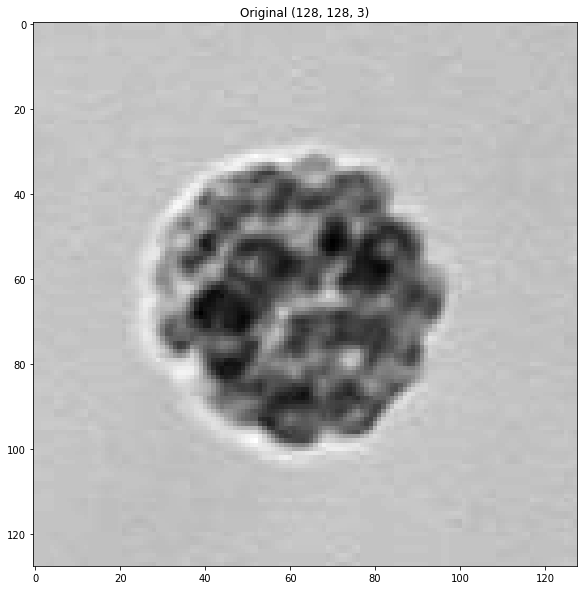

In [5]:
img = cv2.imread('images/one_embryo.tif')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray_float = np.float32(img_gray)

fig = plt.figure(figsize=(10,10))
fig.add_subplot(1,1,1)
plt.imshow(img_gray_float, cmap='gray')
plt.title(f'Original {img.shape}');

## 1) Detect features

### 1.1) Using Harris

(https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_features_harris/py_features_harris.html)

In [6]:
harris = cv2.cornerHarris(img_gray_float, 2, 3, 0.04)

Take only pixels with harris value is above a certain % of the max to get rid of the noise

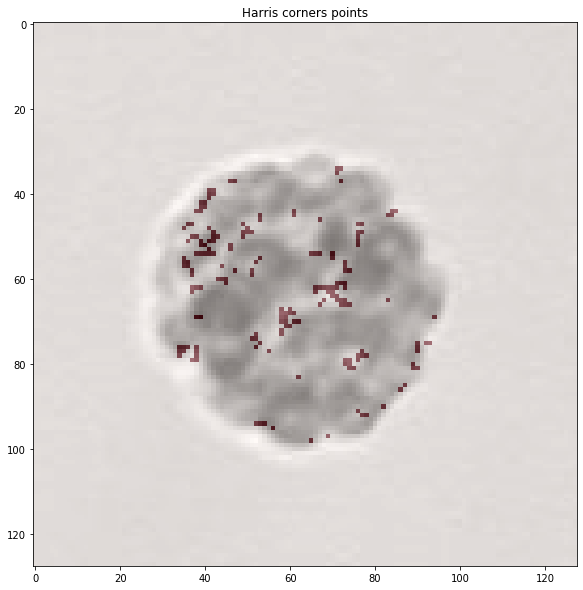

In [11]:
harris_img = np.zeros((img.shape[0], img.shape[1]))
harris_img[harris>0.1*harris.max()] = 1 

fig2 = plt.figure(figsize=(10,10))

fig2.add_subplot(1,1,1)
plt.imshow(img_gray_float, cmap='gray')
plt.imshow(harris_img, alpha=0.5, cmap='Reds')
plt.title('Harris corners points');

### 1.2) Using Shi-Tomasi Corner Detector and Good Features to Track

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_shi_tomasi/py_shi_tomasi.html

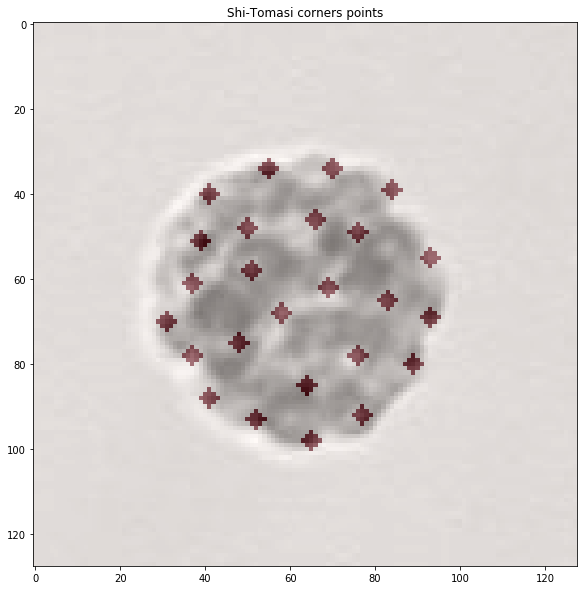

In [14]:
shi_tomasi_points = cv2.goodFeaturesToTrack(img_gray_float, 25, 0.01, 10)
corners = np.int0(shi_tomasi_points)

shi_tomasi_img = np.zeros((img.shape[0], img.shape[1]))

for i in corners:
    x,y = i.ravel()
    cv2.circle(shi_tomasi_img,(x,y),2,255,-1)

fig3 = plt.figure(figsize=(10,10))

fig3.add_subplot(1,1,1)
plt.imshow(img_gray_float, cmap='gray')
plt.imshow(shi_tomasi_img, alpha=0.5, cmap='Reds')
plt.title('Shi-Tomasi corners points');

### 1.3) Using FAST (not working, kernel crash....)

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_fast/py_fast.html

In [15]:
# fast = cv2.FastFeatureDetector(10)
# kp = fast.detect(img,None)
# fast_img = cv2.drawKeypoints(img_gray_float, kp, color=(0,0,255))

# fig4 = plt.figure(figsize=(10,10))

# fig4.add_subplot(1,1,1)
# plt.imshow(fast_img)
# plt.title('FAST corners points');

### 1.4) Using ORB

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_orb/py_orb.html

In [19]:
orb = cv2.ORB_create(10)
kp, desc = orb.detectAndCompute(img, None)
orb_img = cv2.drawKeypoints(img_gray, kp, None, color=(255,0,0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

The size of the cercles show how important the point is, the lines shows its direction based on neighbouring pixels

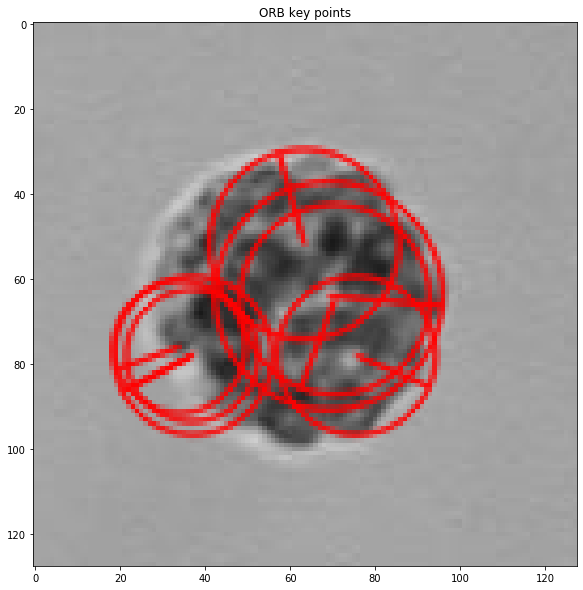

In [20]:
fig5 = plt.figure(figsize=(10,10))

fig5.add_subplot(1,1,1)
plt.imshow(orb_img)
plt.title('ORB key points');